In [122]:
import numpy as np
import statistics as st
import random
from array import *
import matplotlib.pyplot as plt
import math

In [123]:
D = 3 #Banyak Variabel
maxIterasi = 100 #Iterasi
HMS = 7 #Harmony Memory Search
BB = 0 #Batas bawah
BA = 1 #Batas atas

HMCR = 0.9 #Harmony Memory Consideration Rate
PAR = 0.5 #Pitch Adjustment Rate
BW = HMCR*(1-PAR) #Bandwidth

In [124]:
def HarmonyMemory(HMS, D, BA, BB):
  HM = np.empty((HMS,D)) #Nilai didalam Harmony Memory
  for i in range(HMS):
    for j in range(D):
      #Membangkitkan nilai acak 
      HM[i][j] = (random.random() * (BA - BB)) + BB 
  return HM

HM = HarmonyMemory(HMS, D, BA,BB)
print(HM)

[[0.0963584  0.22579648 0.35418792]
 [0.05526352 0.23495672 0.03662776]
 [0.33765971 0.73243532 0.24154105]
 [0.71330956 0.4668491  0.06536853]
 [0.89189186 0.08509817 0.30169944]
 [0.53517705 0.76209457 0.66499882]
 [0.31728848 0.33079549 0.64880331]]


In [125]:
def Fitness(populasi):
  sz = populasi.shape
  HMS = sz[0]
  dimensi = sz[1]

  #Menyimpan nilai Objective tiap individu pada inisialisasi Fit
  Fit = np.empty(HMS)

  for i in range(HMS):
    d = 0
    #Mencari nilai variabel dan disimpan dalam inisialiasi d
    for j in range(dimensi):
        #Permasalahan linear = 15x-x^2
      d = np.sum( (15*( populasi[i][j] )) - (( populasi[i][j] )**2) )

    Fit[i] = d #menyimpan nilai d didalam HM
  return Fit

F = Fitness(HM)
print(F)

[5.18736965 0.5480748  3.56477374 0.97625486 4.43446898 9.53275892
 9.31110385]


In [126]:
def NewHarmony(populasi, PAR, j):
  sz = populasi.shape
  HMS = sz[0]
  dimensi = sz[1]

  #Memilih 3 individu dari populasi secara acak
  r1 = random.randint(0,HMS - 1)
  r2 = random.randint(0,HMS - 1)
  r3 = random.randint(0,HMS - 1)

  #Untuk mengantisipasi nilai error maka setiap hasil di modulo HMS
  while r1 == r2:
    r2 = (r2 + 1) % HMS
  
  while r3 == r1 or r3 == r2:
    r3 = (r3 + 1) % HMS

  v = HM[r3][j] + PAR*(HM[r1][j]-HM[r2][j]) #Nilai koordinat baru
  return v

v = NewHarmony(HM,PAR,1)
print(v)

0.19800237253949965


In [127]:
def ImprovisasiHarmony(HM):
  #HM = HarmonyMemory(HMS, D, BA,BB)
  print("Inisialiasi Harmony Memory :\n",HM)
  F = Fitness(HM)
  print("\nNilai Fitness per-Individu :\n",F)
  #v = NewHarmony(HM,PAR,1)
  newHM = np.empty((1,D))
  FitBest = np.empty((maxIterasi+1))
  FitBest[0] = F.min() 
  t = 0
  while t < maxIterasi:
    for i in range(HMS):
      for j in range(D):
        #Pemilihan Acak
        randHMS = random.randint(0,HMS)
        #Harmony Memory Consideration Rate
        if randHMS < HMCR:
          #HMrand = random.randint(0,HM)
          newHM[0][j] = HM[i][j]
          #Pitch Adjustment
          if randHMS < PAR:
            newHM[0][j] = newHM[0][j] - (randHMS*BW)
            #newHM[0][j] = newHM[0][j] * (1-PAR)
          else :
            newHM[0][j] = newHM[0][j] + (randHMS*BW)
        else :
          newHM[0][j] = HM[i][j]
    #Replacement
    FitU = Fitness(newHM)
    
    if FitU < F[i]:
      F[i] = FitU
      for j in range(D):
        F[i][j] = newHM[0,j]
    FitBest[t] = F.min()
    t+=1
    return FitBest
IndBest = ImprovisasiHarmony(HM)

Inisialiasi Harmony Memory :
 [[0.0963584  0.22579648 0.35418792]
 [0.05526352 0.23495672 0.03662776]
 [0.33765971 0.73243532 0.24154105]
 [0.71330956 0.4668491  0.06536853]
 [0.89189186 0.08509817 0.30169944]
 [0.53517705 0.76209457 0.66499882]
 [0.31728848 0.33079549 0.64880331]]

Nilai Fitness per-Individu :
 [5.18736965 0.5480748  3.56477374 0.97625486 4.43446898 9.53275892
 9.31110385]


In [128]:
print("\nIndividu Terbaik :\n",IndBest)


Individu Terbaik :
 [0.5480748 0.01      0.02      0.03      0.04      0.05      0.06
 0.07      0.08      0.09      0.1       0.11      0.12      0.13
 0.14      0.15      0.16      0.17      0.18      0.19      0.2
 0.21      0.22      0.23      0.24      0.25      0.26      0.27
 0.28      0.29      0.3       0.31      0.32      0.33      0.34
 0.35      0.36      0.37      0.38      0.39      0.4       0.41
 0.42      0.43      0.44      0.45      0.46      0.47      0.48
 0.49      0.5       0.51      0.52      0.53      0.54      0.55
 0.56      0.57      0.58      0.59      0.6       0.61      0.62
 0.63      0.64      0.65      0.66      0.67      0.68      0.69
 0.7       0.71      0.72      0.73      0.74      0.75      0.76
 0.77      0.78      0.79      0.8       0.81      0.82      0.83
 0.84      0.85      0.86      0.87      0.88      0.89      0.9
 0.91      0.92      0.93      0.94      0.95      0.96      0.97
 0.98      0.99      1.       ]


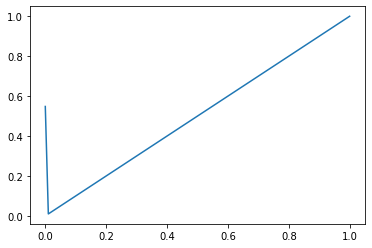

In [129]:
x = np.linspace(0,1,maxIterasi + 1)
plt.plot(x, IndBest, label='f=F')
plt.show()